In [1]:
from astropy.table import Table
import numpy as np
lens_samples = Table.read('lens_samples.fits')
mask_stack = lens_samples['if_obs_stack'].data
mask_single = lens_samples['if_obs_single'].data
stack_samples = lens_samples[mask_stack]
single_samples = lens_samples[mask_single]
stack_samples.sort('SNR_stack')
single_samples.sort('SNR_stack')
print(np.count_nonzero(mask_stack), np.count_nonzero(mask_single))

100598 53550


In [2]:
single_samples[0:5]

thetaE_s0,mass_s0,z_s0,re_s0,q_s0,pa_s0,x_s0,y_s0,mag_g_s0,mag_r_s0,mag_i_s0,vdisp_l,re_l,q_l,z_l,mag_g_l,mag_r_l,mag_i_l,SNR_g,SNR_r,SNR_i,SNR_stack,best_band,mu,if_ring,if_obs_stack,if_obs_single,noise_seed
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bytes1,float64,bool,bool,bool,int64
1.4253661317016681,464979847919.25507,5.5762,0.2012199800387123,0.5617358392743863,92.74892610192865,0.2304082342771638,0.18618012300166525,32.3622,25.8758,24.7035,259.90114112275427,0.6884393170764214,0.7150717246115749,0.5859169847546615,22.544155795798094,20.689145177841525,19.38208756497127,0.029482820804923423,8.824987150825683,20.27809163994028,17.716813668755776,i,9.238736177449532,True,False,True,5265
0.7867803238675963,207362768687.98907,5.5762,0.16698574772088073,0.5492975390522621,140.93089864707005,-0.034217831581507235,-0.3830166152713069,32.3622,25.8758,24.7035,213.15494591354002,0.43758118018718345,0.6045458844575928,0.9660847638413615,26.901272774587053,24.11972085460835,22.863034394501742,0.029542419037910574,8.821015505277199,20.36281276396384,17.72054476131438,i,5.3226754615007446,True,False,True,4781
0.7856455771300606,195567436340.7672,5.5762,0.13531645649906,0.8891995540080295,127.19233216620775,-0.19116579459135125,0.23330490983758242,32.3622,25.8758,24.7035,209.24675623831638,0.4000123131480231,0.7341578562594346,0.8968768465118202,26.686775575753707,23.900269747515445,22.666701252153494,0.029830231005583133,8.839220861491638,20.24574176135332,17.731876111000396,i,5.611180040422622,False,False,True,3319
0.4107142834099198,96806587677.77928,1.3386,0.3058560570510419,0.6272960103479657,123.89189845969706,-0.05641144893956172,-0.21595475259336885,26.8308,25.3814,23.8918,208.37280449105134,0.3296806686926694,0.5548617014374748,0.776756547444554,25.553053515101432,23.183687663575377,21.758399925528067,2.369086520881675,6.843789578619862,20.57752339093496,18.120480550610285,i,3.2804482686744145,True,False,True,92
0.6857394904365267,113161377701.32306,5.5762,0.10153624820099226,0.4939507160248833,119.2009280264475,0.1044554530256699,-0.41462137364371854,32.3622,25.8758,24.7035,182.13120555803278,0.38277815436956253,0.8883115443532207,0.6249189416237083,24.49417116327194,22.5827212224932,21.193943233557146,0.032032605483161794,9.221726143203355,20.206503266260473,18.262775742646646,i,3.8532913158668247,False,False,True,2011


## Generate the example lensing image, fig.2

In [3]:
from SimCsstLens.SimLensImage.MockSurvey import MockSurvey
from SimCsstLens.SimLensImage import Util as SSU

class NewMockSurvey(MockSurvey):
    def load_ideal_lens_from_table(self, this_table):
        self.src_z = this_table['z_s0'].data.reshape(1, -1)
        self.src_xs = this_table['x_s0'].data.reshape(1, -1)
        self.src_ys = this_table['y_s0'].data.reshape(1, -1)
        self.src_Re = this_table['re_s0'].data.reshape(1, -1)
        self.src_q = this_table['q_s0'].data.reshape(1, -1)
        self.src_pa = this_table['pa_s0'].data.reshape(1, -1)
        self.src_thetaE = this_table['thetaE_s0'].data.reshape(1, -1)
        
        self.dfl_Re = this_table['re_l'].data
        self.dfl_z = this_table['z_l'].data
        self.dfl_q = this_table['q_l'].data
        self.dfl_vdisp = this_table['vdisp_l'].data
        for band in self.bands[0:-1]:
            self.__dict__[f'src_app_mag_{band}'] = this_table[f'mag_{band}_s0'].data.reshape(1, -1)
            self.__dict__[f'dfl_app_mag_{band}'] =  this_table[f'mag_{band}_l'].data
        self.n_ideal_lenses = len(self.dfl_z)
        
from SimCsstLens.SimLensImage.MockSurvey import MockSurvey
survey = NewMockSurvey(config_path="./", config_file='csst_setting.yaml')
survey.load_ideal_lens_from_table(stack_samples)

lens_id = 3
this_sim_obj = survey.sim_obj_from(lens_id)
survey.lensing_image_from(this_sim_obj)
this_sn, this_mu = survey.sn_and_mu_from(this_sim_obj)
src_id=0

In [4]:
this_sn

array([[12.90557289, 10.47309267, 11.54464839, 20.00058278]])

In [5]:
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from astropy.visualization import make_lupton_rgb
from matplotlib.colors import LogNorm
import scienceplots
plt.style.use(['science','no-latex', 'nature'])
# plt.style.use(['science','no-latex'])
# Set the font family and size for all text
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.size'] = 10
plt.rcParams['legend.fontsize'] = 9
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
# Set the background color and grid style
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['grid.linewidth'] = 1.5
plt.rcParams['grid.color'] = 'black'
plt.rcParams['grid.alpha'] = 0.5

columnwidth = 3.33
aspect_ratio = 1
fig = plt.figure(constrained_layout=False, figsize=(columnwidth*3+0.6, columnwidth*aspect_ratio))
gs = fig.add_gridspec(2, 6, wspace=0.0, hspace=0.1)


this_ax = fig.add_subplot(gs[0, 0])
im = this_ax.imshow(this_sim_obj[src_id]['g'].image_map_cps, cmap='Greys', origin='lower')
this_ax.text(0.05, 0.85, "g", transform = this_ax.transAxes)
this_ax.set_aspect('equal')
this_ax.set_xticklabels([])
this_ax.set_yticklabels([])
this_ax.set_xticks([])
this_ax.set_yticks([])


this_ax = fig.add_subplot(gs[0, 1])
im = this_ax.imshow(this_sim_obj[src_id]['r'].image_map_cps, cmap='Greys', origin='lower')
this_ax.text(0.05, 0.85, "r", transform = this_ax.transAxes)
this_ax.set_aspect('equal')
this_ax.set_xticklabels([])
this_ax.set_yticklabels([])
this_ax.set_xticks([])
this_ax.set_yticks([])

this_ax = fig.add_subplot(gs[1, 0])
im = this_ax.imshow(this_sim_obj[src_id]['i'].image_map_cps, cmap='Greys', origin='lower')
this_ax.text(0.05, 0.85, "i", transform = this_ax.transAxes)
this_ax.set_aspect('equal')
this_ax.set_xticklabels([])
this_ax.set_yticklabels([])
this_ax.set_xticks([])
this_ax.set_yticks([])

this_ax = fig.add_subplot(gs[1, 1])
im = this_ax.imshow(this_sim_obj[src_id]['stack']['image_map_cps'], cmap='Greys', origin='lower')
this_ax.text(0.05, 0.85, "stack", transform = this_ax.transAxes)
this_ax.set_aspect('equal')
this_ax.set_xticklabels([])
this_ax.set_yticklabels([])
this_ax.set_xticks([])
this_ax.set_yticks([])

color_image = make_lupton_rgb(
    this_sim_obj[src_id]['i'].image_map_cps, 
    this_sim_obj[src_id]['r'].image_map_cps,
    this_sim_obj[src_id]['g'].image_map_cps, 
    Q=10, 
    stretch=0.5,
)
this_ax = fig.add_subplot(gs[:, 2:4])
im = this_ax.imshow(color_image, origin='lower')
this_ax.set_aspect('equal')
this_ax.set_xticklabels([])
this_ax.set_yticklabels([])
this_ax.set_xticks([])
this_ax.set_yticks([])

this_ax = fig.add_subplot(gs[:, 4:])
im = this_ax.imshow(
    (this_sim_obj[src_id]['stack']['image_map_cps'] - this_sim_obj[src_id]['stack']['lens_image_cps'])/this_sim_obj[src_id]['stack']['noise_map_cps'],
    origin='lower', 
    cmap='Greys', 
)
divider = make_axes_locatable(this_ax)
cax = divider.append_axes("right", size="5%", pad=0.05) 
plt.colorbar(im, cax=cax)
this_ax.text(0.05, 0.9, r"Arc-SNR: $\sim20$", transform = this_ax.transAxes)
this_ax.set_aspect('equal')
this_ax.set_xticklabels([])
this_ax.set_yticklabels([])
this_ax.set_xticks([])
this_ax.set_yticks([])

fig.savefig('figures/color_image.pdf', bbox_inches='tight')
plt.close(fig)

## Generate image for lens modeling

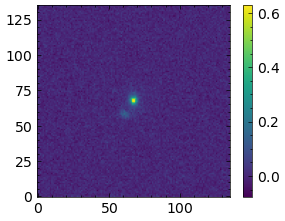

0.00023511817926768352
0.02022829075793162
900.0


In [6]:
exp_time = this_sim_obj[0]['stack']['eff_exp_time']
image_cps = this_sim_obj[src_id]['stack']['image_map_cps']
plt.figure()
plt.imshow(image_cps, origin='lower')
plt.colorbar()
plt.show()
margin = image_cps[0:10,:]
print(np.median(margin))
print(np.std(margin))
print(exp_time)

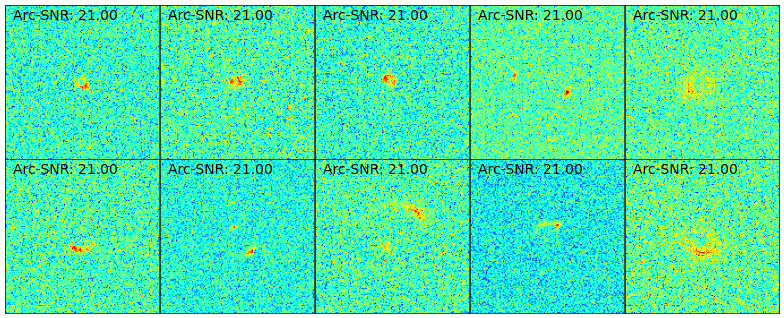

--------------------


In [11]:
import matplotlib.gridspec as gridspec
def retrive_lenses_from(lens_sample_table, SNR=20):
    survey = NewMockSurvey(config_path="./", config_file='csst_setting.yaml')
    survey.load_ideal_lens_from_table(lens_sample_table)

    imgWD = 2
    nimgs = 10
    ncols = 5
    nrows = int(nimgs/ncols)
    fig = plt.figure(figsize = (imgWD*ncols,imgWD*nrows))
    gds = gridspec.GridSpec(nrows, ncols)
    gds.update(wspace=0.0, hspace=0.0) 
    
    start_id = np.abs(lens_sample_table['SNR_stack'].data - SNR).argmin()
    arc_image_list = [None]*nimgs
    arc_snr_list = [None]*nimgs
    for j in range(nimgs):
        this_sim_obj = survey.sim_obj_from(j+start_id)
        survey.lensing_image_from(this_sim_obj)
        arc_image_list[j] = this_sim_obj[src_id]['stack']['image_map_cps'] - this_sim_obj[src_id]['stack']['lens_image_cps']
        snr_map = arc_image_list[j]/this_sim_obj[src_id]['stack']['noise_map_cps']
        arc_snr, _ = survey.sn_and_mu_from(this_sim_obj)
        arc_snr = arc_snr[0,-1]
        arc_snr_list[j] = arc_snr
        
        axs = plt.subplot(gds[int(j/(ncols)), j%(ncols)])
        axs.imshow(snr_map, origin='lower', cmap='jet')
        axs.text(0.05, 0.9, f"Arc-SNR: {arc_snr:.2f}", transform = axs.transAxes)
        axs.set_xticklabels([])
        axs.set_yticklabels([])
        axs.set_xticks([])
        axs.set_yticks([])
        axs.set_aspect('equal')
    plt.show()
    plt.close(fig)
    print('-'*20)
    
    return arc_image_list, arc_snr_list, lens_sample_table[start_id:start_id+nimgs]

mask = stack_samples['thetaE_s0'].data > 0.2
lens_model_samples = stack_samples[mask]
arc_image_list, arc_snr_list, lens_sample_table = retrive_lenses_from(lens_model_samples, SNR=21)